In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/TwiBot-20/Twibot-20.zip" "data.zip"
!unzip data.zip

Archive:  data.zip
   creating: Twibot-20/
  inflating: Twibot-20/dev.json      
  inflating: Twibot-20/LICENSE       
  inflating: Twibot-20/README.txt    
  inflating: Twibot-20/support.json  
  inflating: Twibot-20/test.json     
  inflating: Twibot-20/train.json    
  inflating: Twibot-20/TwiBot-20 Seed Users.txt  


In [3]:
import pandas as pd
import re

In [4]:
train = pd.read_json('/content/Twibot-20/train.json')
test = pd.read_json('/content/Twibot-20/test.json')
#support = pd.read_json('/content/Twibot-20/support.json')
#dev = pd.read_json('/content/Twibot-20/dev.json')

In [5]:
train.head()

,ID,profile,tweet,neighbor,domain,label
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0
1,1297437077403885568,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,"{'following': ['170861207', '23970102', '47293...",[Politics],1
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1


In [6]:
test.head()

,ID,profile,tweet,neighbor,domain,label
0,1188812492010487808,"{'id': '1188812492010487808 ', 'id_str': '1188...",[RT @clevelanddotcom: Three Ohio House Republi...,None,"[Politics, Sports]",1
1,155659213,"{'id': '155659213 ', 'id_str': '155659213 ', '...","[We touch our hair 96 times a day on average, ...",None,"[Politics, Business, Entertainment, Sports]",0
2,147725246,"{'id': '147725246 ', 'id_str': '147725246 ', '...",['He Looked Like He Knew What He Was Doing': C...,"{'following': ['36734275', '20713061', '755419...",[Politics],0
3,1296248637194895360,"{'id': '1296248637194895360 ', 'id_str': '1296...","[Estamos abiertos a colaboraciones, por lo cuá...","{'following': ['87818409', '41390292', '140910...",[Politics],1
4,1339835893,"{'id': '1339835893 ', 'id_str': '1339835893 ',...",[The suffragists chose purple and gold to repr...,None,"[Politics, Business, Entertainment, Sports]",0


In [7]:
train.shape

(8278, 6)

In [8]:
test.shape

(1183, 6)

In [9]:
train['ID'].value_counts()

17461978               1
1202329700             1
944046397522956288     1
595555729              1
3330287297             1
                      ..
1002077772             1
68742060               1
1241721363158765568    1
263292498              1
50471224               1
Name: ID, Length: 8278, dtype: int64

In [10]:
train['tweet']

0       [RT @CarnivalCruise: 🎉 Are you ready to see wh...
1                                                    None
2       [RT @realDonaldTrump: THANK YOU #RNC2020! http...
3       [A family fears they may have been cheated out...
4       [RT @VonteThePlug: Yeah but he ain’t got one h...
                              ...                        
8273    [@sethgoldberg17 @jaysonst Fan interference? I...
8274    [@C130Matt I think I heard a voice from out in...
8275    [@savage_esquire That's unfuckingbelievable.\n...
8276    [@Jomboy_ Doesn’t want to pull anymore Hammys\...
8277    [The sports card market is unreal right now. P...
Name: tweet, Length: 8278, dtype: object

In [11]:
train.loc[:, 'DNA'] = ""

In [12]:
train.head()

,ID,profile,tweet,neighbor,domain,label,DNA
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0,
1,1297437077403885568,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,"{'following': ['170861207', '23970102', '47293...",[Politics],1,
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0,
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0,
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1,


In [13]:
train['tweet'][4]

['RT @VonteThePlug: Yeah but he ain’t got one happy song nigga always distraught 😂\n',
 'RT @VonteThePlug: I’m tryna tell y’all I’m really like that but don’t take my word take a listen 😚🔥 https://t.co/1McoyAVcqh\n',
 'RT @VonteThePlug: Available on all platforms go get it 👇🏾 it’s heat I swear 🔥🤧https://t.co/lRDn7UGwNI\n',
 'RT @VonteThePlug: Boy fuck you\n',
 'RT @VonteThePlug: Bodied Da Baby beat. Ight Twitter y’all know what to do 🔥 https://t.co/nLZAzQUziG\n',
 'RT @VonteThePlug: J Cole is a Aquarius\nMichael Jordan is a Aquarius\nBob Marley is A Aquarius\nChris Rock is a Aqaurius\nKevin Gates is a Aqa…\n',
 'RT @VonteThePlug: @gucci1017 @VonteThePlugNC https://t.co/LtOiiUCVcq\n',
 'RT @VonteThePlug: In hindsight, I just know this nigga was from Atlanta. https://t.co/NAdaHryMC8\n',
 'Don’t let me find a bitch like Love cause I promise we killing ERRBODY. Justifiably of course 🤗\n',
 'RT @VonteThePlug: Why my beard don’t want me man 😭😭😭 https://t.co/kVp3Vi0oIU\n',
 'RT @lennyvandross

In [14]:
print(re.findall("#\w+", "This is a string that needs processing #ugh #yikes"))

['#ugh', '#yikes']


In [15]:
def getNoOfUrls(s):
  return len(re.findall(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", s))

In [16]:
# text = "This is a string that needs processing #ugh #yikes https:\\www.google.com"
# ans = ''
# if text[0] == 'R' and text[1] == 'T':
#   # train.loc[i, 'DNA'] = train.loc[i, 'DNA'] + 'T'
#   ans = ans + 'T'
# elif text[0] == '@':
#   # train.loc[i, 'DNA'] = train.loc[i, 'DNA'] + 'C'
#   ans = ans + 'C'
# else:
#   # train.loc[i, 'DNA'] = train.loc[i, 'DNA'] + 'A'
#   ans = ans + 'A'

# if len(re.findall("#\w+", text)) > 0:
#   # train.loc[i, 'DNA'] = train.loc[i, 'DNA'] + 'H'
#   ans = ans + 'H'
# if getNoOfUrls(text) > 0:
#   # train.loc[i, 'DNA'] = train.loc[i, 'DNA'] + 'U'
#   ans = ans + 'U'

In [17]:
# print(ans)

In [18]:
for i in range(train.shape[0]):
  l = train['tweet'][i]
  if l is not None:
    lis = train['tweet'][i]
    for j in range(len(lis)):
      text = lis[j]
      if text[0] == 'R' and text[1] == 'T':
        train.loc[i, 'DNA'] = train.loc[i, 'DNA'] + 'T'
      elif text[0] == '@':
        train.loc[i, 'DNA'] = train.loc[i, 'DNA'] + 'C'
      else:
        train.loc[i, 'DNA'] = train.loc[i, 'DNA'] + 'A'
      if getNoOfUrls(text) > 0:
        train.loc[i, 'DNA'] = train.loc[i, 'DNA'] + 'U'

In [19]:
train.head()

,ID,profile,tweet,neighbor,domain,label,DNA
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0,TAUAUAUAAAUAUAUAUAUAUAUAUAAUAUAUAUCUAUAUAUAUAU...
1,1297437077403885568,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,"{'following': ['170861207', '23970102', '47293...",[Politics],1,
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0,TUAUTTTAUATUAUTAUAUTUTUTUTATAUTUTTUTTAUTUTTUAU...
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0,AUAUAUTUTUAUTUTAUAUTUAUAUTUTUAUTUAUTTAAAUTTUTU...
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1,TTUTUTTUTTUTUATUTUTAAAUAAUAUAUAUAUAATUTUTUAUAT...


In [20]:
test.loc[:, 'DNA'] = ""

In [21]:
for i in range(len(test['tweet'])):
  l = test['tweet'][i]
  if l is not None:
    lis = test['tweet'][i]
    for j in range(len(lis)):
      text = lis[j]
      if text[0] == 'R' and text[1] == 'T':
        test.loc[i, 'DNA'] = test.loc[i, 'DNA'] + 'T'
      elif text[0] == '@':
        test.loc[i, 'DNA'] = test.loc[i, 'DNA'] + 'C'
      else:
        test.loc[i, 'DNA'] = test.loc[i, 'DNA'] + 'A'
      if getNoOfUrls(text) > 0:
        test.loc[i, 'DNA'] = test.loc[i, 'DNA'] + 'U'

In [22]:
test.head()

,ID,profile,tweet,neighbor,domain,label,DNA
0,1188812492010487808,"{'id': '1188812492010487808 ', 'id_str': '1188...",[RT @clevelanddotcom: Three Ohio House Republi...,None,"[Politics, Sports]",1,TTTCTTTTTCTTCUTUTCCTTTUTTTTTTTAUTUTTUTTCUTUTTT...
1,155659213,"{'id': '155659213 ', 'id_str': '155659213 ', '...","[We touch our hair 96 times a day on average, ...",None,"[Politics, Business, Entertainment, Sports]",0,AUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAU...
2,147725246,"{'id': '147725246 ', 'id_str': '147725246 ', '...",['He Looked Like He Knew What He Was Doing': C...,"{'following': ['36734275', '20713061', '755419...",[Politics],0,AUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAU...
3,1296248637194895360,"{'id': '1296248637194895360 ', 'id_str': '1296...","[Estamos abiertos a colaboraciones, por lo cuá...","{'following': ['87818409', '41390292', '140910...",[Politics],1,AA
4,1339835893,"{'id': '1339835893 ', 'id_str': '1339835893 ',...",[The suffragists chose purple and gold to repr...,None,"[Politics, Business, Entertainment, Sports]",0,AUAAAUAAUAUAUAUATTTTTUTAUAUAUAUAUTTTAUCAUAUAAU...


In [23]:
test.iloc[0, 2:3][0]

['RT @clevelanddotcom: Three Ohio House Republicans have drafted articles of impeachment against Gov. Mike DeWine, claiming many of his admin…\n',
 'RT @CaliConserv1: California Governor Gavin Newsom should be arrested and put in jail immediately.\n',
 'RT @NRA: Only after all our guns have been banned, all our words have been censored, all our history has been erased, all our freedoms have…\n',
 '@ArtValley818_ CaliRed.\n',
 'RT @ArtValley818_: I will be looking into starting a non-profit this week to help turn Cali red.\n\nHelp me pick a name! 👇🏼👇🏼\n',
 'RT @SharqStealth: @ArtValley818_ U just did.  #CaliRed\n',
 'RT @_ROB_29: Nancy Pelosi says Republicans are “The Enemy of the State”\n\nAntifa = People will do what they will\nMS-13 = A spark of divinity…\n',
 'RT @CoreysDigs: Wow. This is awful.\n',
 'RT @lilbityzer: @policrits @SharonIsrael10 @SpeakerPelosi\n',
 '@DavidNutzuki Things aren’t always clear, especially when a subject is noncooperative, resisting arrest &amp; attempting

In [24]:
test.iloc[0]['DNA']

'TTTCTTTTTCTTCUTUTCCTTTUTTTTTTTAUTUTTUTTCUTUTTTTUCTUTUTTUTTTUTUTTUTUTCTUTUTUTTAUTUTTTUTUTTUTTTTUTUTTCUTTTTTTTUTTTTTTTTTTUTTTTTTTTTTCCTTTUTUTTCTUCTCTCTTTTTTTTUCTTTCTCTTUTTTTTUTUTUTUTUTUTUCTUTTUCTUTUTTCTUTTTCTTTTTTCTCTUCTTTTCTACTAUTTUTUCCTTTUTTTTTUTTTTTAUC'

In [25]:
train = train[train['DNA']!= ""]
test = test[test['DNA']!=""]

In [26]:
train.head()

,ID,profile,tweet,neighbor,domain,label,DNA
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0,TAUAUAUAAAUAUAUAUAUAUAUAUAAUAUAUAUCUAUAUAUAUAU...
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0,TUAUTTTAUATUAUTAUAUTUTUTUTATAUTUTTUTTAUTUTTUAU...
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0,AUAUAUTUTUAUTUTAUAUTUAUAUTUTUAUTUAUTTAAAUTTUTU...
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1,TTUTUTTUTTUTUATUTUTAAAUAAUAUAUAUAUAATUTUTUAUAT...
5,34743251,"{'id': '34743251 ', 'id_str': '34743251 ', 'na...","[RT @elonmusk: Aloha, welcome back from space ...",None,"[Politics, Business, Entertainment, Sports]",0,TUTUAUAUAUAUAUAUAUAUAUATAUAAUAUAUAUTUAUAUAUAUA...


In [27]:
test.head()

,ID,profile,tweet,neighbor,domain,label,DNA
0,1188812492010487808,"{'id': '1188812492010487808 ', 'id_str': '1188...",[RT @clevelanddotcom: Three Ohio House Republi...,None,"[Politics, Sports]",1,TTTCTTTTTCTTCUTUTCCTTTUTTTTTTTAUTUTTUTTCUTUTTT...
1,155659213,"{'id': '155659213 ', 'id_str': '155659213 ', '...","[We touch our hair 96 times a day on average, ...",None,"[Politics, Business, Entertainment, Sports]",0,AUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAU...
2,147725246,"{'id': '147725246 ', 'id_str': '147725246 ', '...",['He Looked Like He Knew What He Was Doing': C...,"{'following': ['36734275', '20713061', '755419...",[Politics],0,AUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAU...
3,1296248637194895360,"{'id': '1296248637194895360 ', 'id_str': '1296...","[Estamos abiertos a colaboraciones, por lo cuá...","{'following': ['87818409', '41390292', '140910...",[Politics],1,AA
4,1339835893,"{'id': '1339835893 ', 'id_str': '1339835893 ',...",[The suffragists chose purple and gold to repr...,None,"[Politics, Business, Entertainment, Sports]",0,AUAAAUAAUAUAUAUATTTTTUTAUAUAUAUAUTTTAUCAUAUAAU...


In [28]:
import random
import sys
import time
import zlib
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from scipy.stats import ttest_1samp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

def compress_dna_df(dna):
    '''Return a dataframe with compression facts for a series of dna.'''

    # Convert DNA in string object to bytes object.
    dna_bytes = dna['DNA'].apply(lambda s: s.encode('utf-8'))

    # Run compression on each DNA string in the sample.
    dna_compressed = dna_bytes.apply(lambda b: zlib.compress(b))

    # Create dataframe with compression facts.
    dna.loc[:, 'original_dna_size'] = dna_bytes.apply(sys.getsizeof)
    dna.loc[:,'compressed_dna_size'] = dna_compressed.apply(sys.getsizeof)
    
    dna.loc[:, 'compression_ratio'] = dna['original_dna_size'] / dna['compressed_dna_size']
    return dna

In [29]:
new_train = compress_dna_df(train)
new_test = compress_dna_df(test)

In [30]:
new_train.head()

,ID,profile,tweet,neighbor,domain,label,DNA,original_dna_size,compressed_dna_size,compression_ratio
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0,TAUAUAUAAAUAUAUAUAUAUAUAUAAUAUAUAUCUAUAUAUAUAU...,394,120,3.283333
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0,TUAUTTTAUATUAUTAUAUTUTUTUTATAUTUTTUTTAUTUTTUAU...,323,124,2.604839
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0,AUAUAUTUTUAUTUTAUAUTUAUAUTUTUAUTUAUTTAAAUTTUTU...,386,126,3.063492
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1,TTUTUTTUTTUTUATUTUTAAAUAAUAUAUAUAUAATUTUTUAUAT...,178,91,1.956044
5,34743251,"{'id': '34743251 ', 'id_str': '34743251 ', 'na...","[RT @elonmusk: Aloha, welcome back from space ...",None,"[Politics, Business, Entertainment, Sports]",0,TUTUAUAUAUAUAUAUAUAUAUATAUAAUAUAUAUTUAUAUAUAUA...,374,118,3.169492


In [31]:
new_test.head()

,ID,profile,tweet,neighbor,domain,label,DNA,original_dna_size,compressed_dna_size,compression_ratio
0,1188812492010487808,"{'id': '1188812492010487808 ', 'id_str': '1188...",[RT @clevelanddotcom: Three Ohio House Republi...,None,"[Politics, Sports]",1,TTTCTTTTTCTTCUTUTCCTTTUTTTTTTTAUTUTTUTTCUTUTTT...,286,122,2.344262
1,155659213,"{'id': '155659213 ', 'id_str': '155659213 ', '...","[We touch our hair 96 times a day on average, ...",None,"[Politics, Business, Entertainment, Sports]",0,AUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAU...,432,56,7.714286
2,147725246,"{'id': '147725246 ', 'id_str': '147725246 ', '...",['He Looked Like He Knew What He Was Doing': C...,"{'following': ['36734275', '20713061', '755419...",[Politics],0,AUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAU...,425,85,5.000000
3,1296248637194895360,"{'id': '1296248637194895360 ', 'id_str': '1296...","[Estamos abiertos a colaboraciones, por lo cuá...","{'following': ['87818409', '41390292', '140910...",[Politics],1,AA,35,43,0.813953
4,1339835893,"{'id': '1339835893 ', 'id_str': '1339835893 ',...",[The suffragists chose purple and gold to repr...,None,"[Politics, Business, Entertainment, Sports]",0,AUAAAUAAUAUAUAUATTTTTUTAUAUAUAUAUTTTAUCAUAUAAU...,364,120,3.033333


In [32]:
tr = new_train[['ID', 'DNA', 'original_dna_size', 'compressed_dna_size', 'compression_ratio', 'label']]

In [33]:
tr.head()

,ID,DNA,original_dna_size,compressed_dna_size,compression_ratio,label
0,17461978,TAUAUAUAAAUAUAUAUAUAUAUAUAAUAUAUAUCUAUAUAUAUAU...,394,120,3.283333,0
2,17685258,TUAUTTTAUATUAUTAUAUTUTUTUTATAUTUTTUTTAUTUTTUAU...,323,124,2.604839,0
3,15750898,AUAUAUTUTUAUTUTAUAUTUAUAUTUTUAUTUAUTTAAAUTTUTU...,386,126,3.063492,0
4,1659167666,TTUTUTTUTTUTUATUTUTAAAUAAUAUAUAUAUAATUTUTUAUAT...,178,91,1.956044,1
5,34743251,TUTUAUAUAUAUAUAUAUAUAUATAUAAUAUAUAUTUAUAUAUAUA...,374,118,3.169492,0


In [34]:
te = new_test[['ID', 'DNA', 'original_dna_size', 'compressed_dna_size', 'compression_ratio', 'label']]

In [35]:
te.head()

,ID,DNA,original_dna_size,compressed_dna_size,compression_ratio,label
0,1188812492010487808,TTTCTTTTTCTTCUTUTCCTTTUTTTTTTTAUTUTTUTTCUTUTTT...,286,122,2.344262,1
1,155659213,AUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAU...,432,56,7.714286,0
2,147725246,AUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAU...,425,85,5.000000,0
3,1296248637194895360,AA,35,43,0.813953,1
4,1339835893,AUAAAUAAUAUAUAUATTTTTUTAUAUAUAUAUTTTAUCAUAUAAU...,364,120,3.033333,0


In [36]:
#ACT,U is used
#For testset-1
#String Compression - Compressed DNA Size & 0.972 & 0.964 & 0.979 & 0.972 & 0.943 & 0.964 \\
#String Compression - Compression Ratio & 0.977 & 0.977 & 0.977 & 0.977 & 0.954 & 0.977 \\

#For test-set-2
#String Compression - Compressed DNA Size & 0.962 & 0.974 & 0.947 & 0.960 & 0.924 & 0.976 \\
#String Compression - Compression Ratio & 0.967 & 0.989 & 0.943 & 0.965 & 0.935 & 0.990 \\


#ACT is used
#String Compression - Compressed DNA Size & 0.969 & 0.961 & 0.977 & 0.969 & 0.938 & 0.961 \\
#String Compression - Compression Ratio & 0.977 & 0.981 & 0.973 & 0.977 & 0.955 & 0.981 \\
#String Compression - Compressed DNA Size & 0.962 & 0.974 & 0.947 & 0.960 & 0.924 & 0.976 \\
#String Compression - Compression Ratio & 0.967 & 0.989 & 0.943 & 0.965 & 0.935 & 0.990 \\

#ACTH is used
all = pd.concat([tr,te])
all

,ID,DNA,original_dna_size,compressed_dna_size,compression_ratio,label
0,17461978,TAUAUAUAAAUAUAUAUAUAUAUAUAAUAUAUAUCUAUAUAUAUAU...,394,120,3.283333,0
2,17685258,TUAUTTTAUATUAUTAUAUTUTUTUTATAUTUTTUTTAUTUTTUAU...,323,124,2.604839,0
3,15750898,AUAUAUTUTUAUTUTAUAUTUAUAUTUTUAUTUAUTTAAAUTTUTU...,386,126,3.063492,0
4,1659167666,TTUTUTTUTTUTUATUTUTAAAUAAUAUAUAUAUAATUTUTUAUAT...,178,91,1.956044,1
5,34743251,TUTUAUAUAUAUAUAUAUAUAUATAUAAUAUAUAUTUAUAUAUAUA...,374,118,3.169492,0
...,...,...,...,...,...,...
1178,452754350,AUCUATUAUTTUTAUAUAUAUTTAUTAUTAUAUAUAUAUAUCAUTA...,388,117,3.316239,1
1179,850435801687183360,TCUCAUCUCUAUCUCCAUCUAUCCCCUTAUTTCAUCCAUCAUTUTU...,339,143,2.370629,1
1180,2188795745,TTUCTUTUCTCTUTUTTTCTTUCAUTTCCCUTUCCUTCUCCCUCUC...,294,128,2.296875,1
1181,940687680,TTTTTUTTTTUTTTTTTTTTTTTTTTTTTUTTUTTTTUTTTTUTTT...,215,92,2.336957,1


In [37]:
tr['original_dna_size'].describe()

count    8223.000000
mean      281.525842
std       103.920565
min        34.000000
25%       257.000000
50%       298.000000
75%       348.000000
max       433.000000
Name: original_dna_size, dtype: float64

In [38]:
te['original_dna_size'].describe()

count    1173.000000
mean      283.144928
std       105.486988
min        34.000000
25%       256.000000
50%       297.000000
75%       352.000000
max       433.000000
Name: original_dna_size, dtype: float64

In [39]:
tr['label'].value_counts()

1    4631
0    3592
Name: label, dtype: int64

In [40]:
te['label'].value_counts()

1    634
0    539
Name: label, dtype: int64

##### Plot of Uncompressed DNA Size vs. Compressed DNA Size.

Includes the following accounts:
1. Genuine users
1. Social Spambots \#1
1. Social Spambots \#2
1. Social Spambots \#3
1. Traditional Spambots \#1

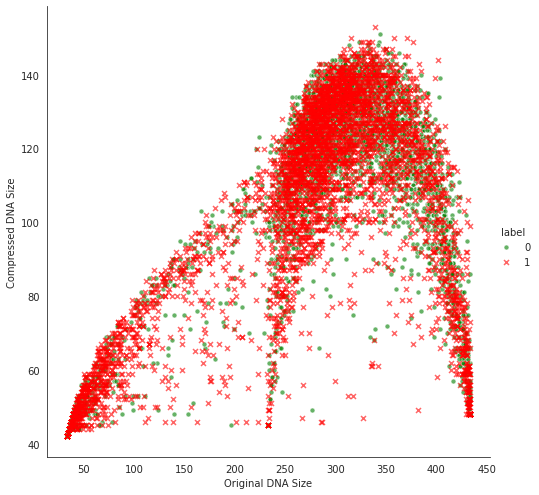

In [41]:
sns.set_style("white")

pal = {
    0: 'green',
    1: 'red'
}

g = sns.FacetGrid(tr, hue='label', palette=pal, height=7, hue_kws=dict(marker=["o", "x"]))
g.map(plt.scatter, "original_dna_size", "compressed_dna_size", s=25, alpha=.6, edgecolor="white")
g.add_legend()
g.set_axis_labels('Original DNA Size', 'Compressed DNA Size')

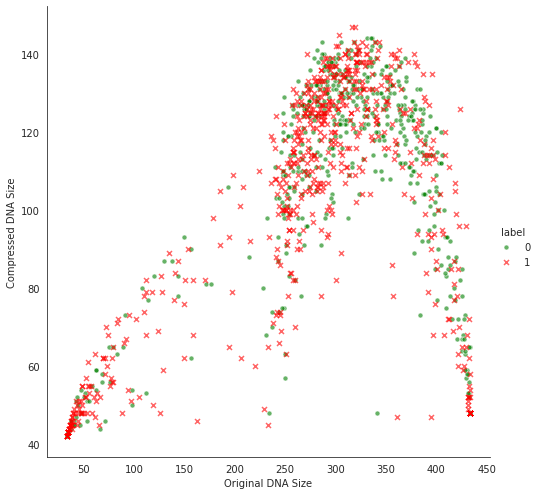

In [42]:
sns.set_style("white")

pal = {
    0: 'green',
    1: 'red'
}

g = sns.FacetGrid(te, hue='label', palette=pal, height=7, hue_kws=dict(marker=["o", "x"]))
g.map(plt.scatter, "original_dna_size", "compressed_dna_size", s=25, alpha=.6, edgecolor="white")
g.add_legend()
g.set_axis_labels('Original DNA Size', 'Compressed DNA Size')

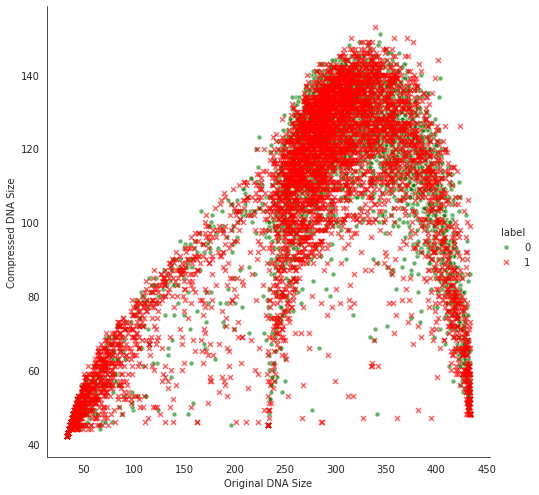

In [43]:
sns.set_style("white")

pal = {
    0: 'green',
    1: 'red'
}

g = sns.FacetGrid(all, hue='label', palette=pal, height=7, hue_kws=dict(marker=["o", "x"]))
g.map(plt.scatter, "original_dna_size", "compressed_dna_size", s=25, alpha=.6, edgecolor="white")
g.add_legend()
g.set_axis_labels('Original DNA Size', 'Compressed DNA Size')

##### Plot of DNA Size vs. Compression Ratio.

Includes the following accounts:
1. Genuine users
1. Social Spambots \#1
1. Social Spambots \#2
1. Social Spambots \#3
1. Traditional Spambots \#1

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


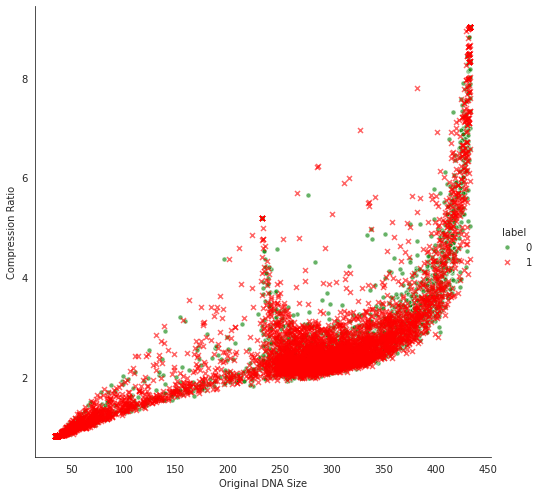

In [44]:
sns.set_style("white")

pal = {
    0: 'green',
    1: 'red'
}

g = sns.FacetGrid(tr, hue='label', palette=pal, size=7, hue_kws=dict(marker=["o", "x"]))
g.map(plt.scatter, "original_dna_size", "compression_ratio", s=25, alpha=.6, edgecolor="white")
g.add_legend()
g.set_axis_labels('Original DNA Size', 'Compression Ratio')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


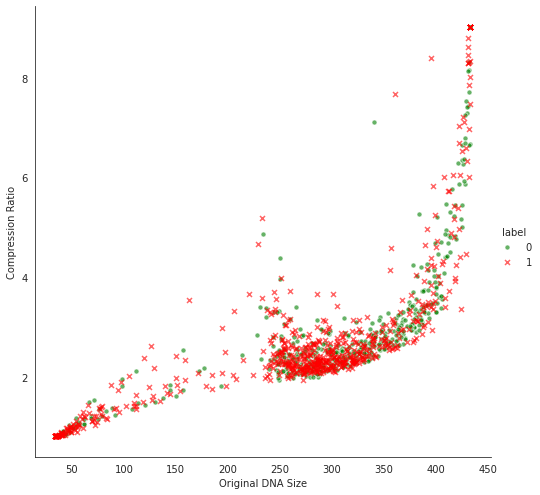

In [45]:
sns.set_style("white")

pal = {
    0: 'green',
    1: 'red'
}

g = sns.FacetGrid(te, hue='label', palette=pal, size=7, hue_kws=dict(marker=["o", "x"]))
g.map(plt.scatter, "original_dna_size", "compression_ratio", s=25, alpha=.6, edgecolor="white")
g.add_legend()
g.set_axis_labels('Original DNA Size', 'Compression Ratio')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


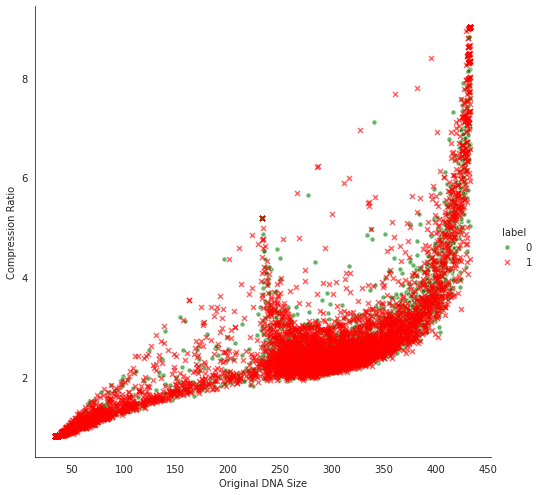

In [46]:
sns.set_style("white")

pal = {
    0: 'green',
    1: 'red'
}

g = sns.FacetGrid(all, hue='label', palette=pal, size=7, hue_kws=dict(marker=["o", "x"]))
g.map(plt.scatter, "original_dna_size", "compression_ratio", s=25, alpha=.6, edgecolor="white")
g.add_legend()
g.set_axis_labels('Original DNA Size', 'Compression Ratio')

##### Historgram for Compression Ratio

Includes the following accounts:
1. Genuine users
1. Social Spambots \#1
1. Social Spambots \#2
1. Social Spambots \#3
1. Traditional Spambots \#1

In [47]:
tr['compression_ratio'].describe()

count    8223.000000
mean        2.738992
std         1.429883
min         0.809524
25%         2.167834
50%         2.421875
75%         2.918367
max         9.020833
Name: compression_ratio, dtype: float64

In [48]:
te['compression_ratio'].describe()

count    1173.000000
mean        2.821964
std         1.574048
min         0.809524
25%         2.169355
50%         2.450820
75%         2.968254
max         9.020833
Name: compression_ratio, dtype: float64

In [49]:
all['compression_ratio'].describe()

count    9396.000000
mean        2.749350
std         1.448835
min         0.809524
25%         2.167883
50%         2.425532
75%         2.928000
max         9.020833
Name: compression_ratio, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


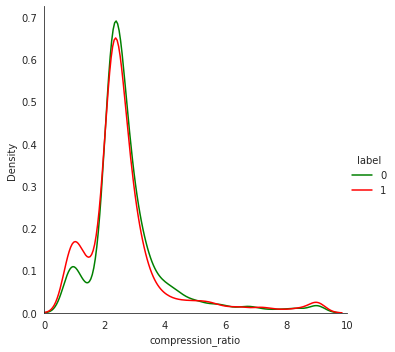

In [50]:
g = sns.FacetGrid(tr, hue='label', palette=pal, size=5)
g.set(xlim=(0, 10))
g.map(sns.kdeplot, 'compression_ratio')
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


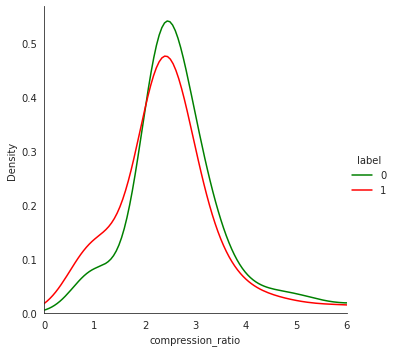

In [51]:
g = sns.FacetGrid(te, hue='label', palette=pal, size=5)
g.set(xlim=(0, 6))
g.map(sns.kdeplot, 'compression_ratio')
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: ignored

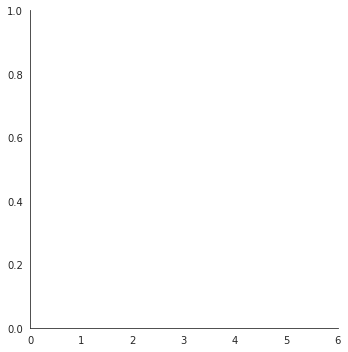

In [52]:
# g = sns.FacetGrid(all, hue='label', palette=pal, size=5)
# g.set(xlim=(0, 6))
# g.map(sns.kdeplot, 'compression_ratio')
# g.add_legend()

In [53]:
def evaluate(y_test, predictions):
    '''Return a dataframe with accuracy, precision, recall and f1 scores for predictions.'''
    
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    specificity = tn / (tn+fp)
    
    results = [
        {
            'Metric': 'Accuracy',
            'Score': accuracy_score(y_test, predictions)
        },
        {
            'Metric': 'Precision',
            'Score': precision_score(y_test, predictions)
        },
        {
            'Metric': 'Recall',
            'Score': recall_score(y_test, predictions)
        },
        {
            'Metric': 'F1 Score',
            'Score': f1_score(y_test, predictions)
        },
        {
            'Metric': 'MCC',
            'Score': matthews_corrcoef(y_test, predictions)
        },
        {
            'Metric': 'Specificity',
            'Score': specificity
        },
    ]

    return pd.DataFrame(results)

In [54]:
def train_predict_evaluate(dna, features, test_size=0.5):
    '''Train a Logistic Regression model with given features
    using default parameters on a random sample of data.'''

    # Randomly shuffle the dna dataframe.
    dna = utils.shuffle(dna)

    # Features and labels.
    X = dna[features]
    y = dna.loc[:, 'label']

    # Split the dataset for training and testing using Logistic Regression.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # Logistic Regression classifier with default parameters.
    classifier = LogisticRegression()

    # Train the classifier.
    start_train = time.time()
    classifier.fit(X_train, y_train)
    end_train = time.time()

    # Make predictions on the test set.
    start_test = time.time()
    predictions = classifier.predict(X_test)
    end_test = time.time()

    # Evaluation on the test set.
    results = evaluate(y_test, predictions)

    return results

In [55]:
k_common_substring_2 = pd.DataFrame({'Supervised': [0.970, 0.970, 0.940, 0.978, 0.961, 0.979], 
                                     'Unsupervised': [0.929, 0.923, 0.867, 1.000, 0.858, 1.000]},
                                    index=['Accuracy', 'F1 Score', 'MCC', 'Precision', 'Recall', 'Specificity'])

In [56]:
k_common_substring_1 = pd.DataFrame({'Supervised': [0.977, 0.977, 0.955, 0.982, 0.977, 0.981],
                                     'Unsupervised': [0.976, 0.977, 0.952, 0.982, 0.972, 0.981]}, 
                                    index=['Accuracy', 'F1 Score', 'MCC', 'Precision', 'Recall', 'Specificity'])


1. Logistic Regression with Original DNA Size + Compressed DNA Size

In [57]:
results = pd.DataFrame()

for i in range(1000):
    np.random.seed(i)
    results = pd.concat([results, train_predict_evaluate(tr, ['original_dna_size', 'compressed_dna_size'])])

# Compute average scores for each metric
results_with_length = results.groupby(by=['Metric']) \
               .mean() \
               .rename({'Score': 'Mean'}, axis=1) \
               .join(results.groupby(by=['Metric'])
                            .std() \
                            .rename({'Score': 'Std.'}, axis=1))

# Compute statistical significance against the method k-common-substring for DNA sequences
stat_sig = []
for metric in k_common_substring_1.index:
    s = dict()

    ts, ps = ttest_1samp(results[results['Metric'] == metric]['Score'], 
                         k_common_substring_1['Supervised'][metric])
    tu, pu = ttest_1samp(results[results['Metric'] == metric]['Score'], 
                         k_common_substring_1['Unsupervised'][metric])

    s['Metric'] = metric
    s['t-supervised'] = round(ts, 4)
    s['t-unsupervised'] = round(tu, 4)
    s['p-supervised'] = round(ps, 4)
    s['p-unsupervised'] = round(pu, 4)
    s['Mean'] = results[results['Metric'] == metric]['Score'].mean()
    s['SD'] = results[results['Metric'] == metric]['Score'].std()
    s['k-supervised'] = k_common_substring_1['Supervised'][metric]
    s['k-unsupervised'] = k_common_substring_1['Unsupervised'][metric]
    
    stat_sig.append(s)

stat_sig = pd.DataFrame(stat_sig).set_index(['Metric'])

stat_sig

,t-supervised,t-unsupervised,p-supervised,p-unsupervised,Mean,SD,k-supervised,k-unsupervised
Metric,,,,,,,,
Accuracy,-1446.0495,-1442.5219,0.0,0.0,0.567082,0.008964,0.977,0.976
F1 Score,-1089.9012,-1089.9012,0.0,0.0,0.703627,0.007932,0.977,0.977
MCC,-951.9712,-948.8034,0.0,0.0,0.053456,0.029948,0.955,0.952
Precision,-1058.7436,-1058.7436,0.0,0.0,0.573102,0.012213,0.982,0.982
Recall,-40.9283,-37.6709,0.0,0.0,0.914176,0.048540,0.977,0.972
Specificity,-376.1249,-376.1249,0.0,0.0,0.120918,0.072312,0.981,0.981


2. Logistic Regression with Original DNA Size + Compression Ratio

In [58]:
results = pd.DataFrame()
for i in range(1000):
    np.random.seed(i)
    results = pd.concat([results, train_predict_evaluate(tr, ['original_dna_size', 'compression_ratio'])])

# Compute average scores for each metric
results_with_ratio = results.groupby(by=['Metric']) \
               .mean() \
               .rename({'Score': 'Mean'}, axis=1) \
               .join(results.groupby(by=['Metric'])
                            .std() \
                            .rename({'Score': 'Std.'}, axis=1))

# Compute statistical significance against the method k-common-substring for DNA sequences
stat_sig = []
for metric in k_common_substring_1.index:
    s = dict()

    ts, ps = ttest_1samp(results[results['Metric'] == metric]['Score'], 
                         k_common_substring_1['Supervised'][metric])
    tu, pu = ttest_1samp(results[results['Metric'] == metric]['Score'], 
                         k_common_substring_1['Unsupervised'][metric])

    s['Metric'] = metric
    s['t-supervised'] = round(ts, 4)
    s['t-unsupervised'] = round(tu, 4)
    s['p-supervised'] = round(ps, 4)
    s['p-unsupervised'] = round(pu, 4)
    s['Mean'] = results[results['Metric'] == metric]['Score'].mean()
    s['SD'] = results[results['Metric'] == metric]['Score'].std()
    s['k-supervised'] = k_common_substring_1['Supervised'][metric]
    s['k-unsupervised'] = k_common_substring_1['Unsupervised'][metric]
    
    stat_sig.append(s)

stat_sig = pd.DataFrame(stat_sig).set_index(['Metric'])

stat_sig

,t-supervised,t-unsupervised,p-supervised,p-unsupervised,Mean,SD,k-supervised,k-unsupervised
Metric,,,,,,,,
Accuracy,-1391.1798,-1387.6420,0.0,0.0,0.583762,0.008939,0.977,0.976
F1 Score,-1230.4464,-1230.4464,0.0,0.0,0.696499,0.007209,0.977,0.977
MCC,-1259.8160,-1255.3135,0.0,0.0,0.115585,0.021070,0.955,0.952
Precision,-955.0532,-955.0532,0.0,0.0,0.591415,0.012933,0.982,0.982
Recall,-100.6023,-96.6640,0.0,0.0,0.849277,0.040148,0.977,0.972
Specificity,-379.0941,-379.0941,0.0,0.0,0.242555,0.061599,0.981,0.981


In [59]:
print('String Compression - Compressed DNA Size &',
      '{:.3f} &'.format(results_with_length['Mean']['Accuracy']),
      '{:.3f} &'.format(results_with_length['Mean']['Precision']),
      '{:.3f} &'.format(results_with_length['Mean']['Recall']),
      '{:.3f} &'.format(results_with_length['Mean']['F1 Score']),
      '{:.3f} &'.format(results_with_length['Mean']['MCC']),
      '{:.3f} \\\\'.format(results_with_length['Mean']['Specificity']))

print('String Compression - Compression Ratio &',
      '{:.3f} &'.format(results_with_ratio['Mean']['Accuracy']),
      '{:.3f} &'.format(results_with_ratio['Mean']['Precision']),
      '{:.3f} &'.format(results_with_ratio['Mean']['Recall']),
      '{:.3f} &'.format(results_with_ratio['Mean']['F1 Score']),
      '{:.3f} &'.format(results_with_ratio['Mean']['MCC']),
      '{:.3f} \\\\'.format(results_with_ratio['Mean']['Specificity']))

String Compression - Compressed DNA Size & 0.567 & 0.573 & 0.914 & 0.704 & 0.053 & 0.121 \\
String Compression - Compression Ratio & 0.584 & 0.591 & 0.849 & 0.696 & 0.116 & 0.243 \\


In [60]:
X_train = tr[['compressed_dna_size', 'original_dna_size', 'compression_ratio']]
y_train = tr.loc[:, 'label']

X_test = te[['compressed_dna_size', 'original_dna_size', 'compression_ratio']]
y_test = te.loc[:, 'label']
# Logistic Regression classifier with default parameters.
classifier = LogisticRegression()

# Train the classifier.
start_train = time.time()
classifier.fit(X_train, y_train)
end_train = time.time()

# Make predictions on the test set.
start_test = time.time()
predictions = classifier.predict(X_test)
end_test = time.time()

# Evaluation on the test set.
results = evaluate(y_test, predictions)


In [61]:
print(results)

        Metric     Score
0     Accuracy  0.588235
1    Precision  0.582514
2       Recall  0.840694
3     F1 Score  0.688186
4          MCC  0.158784
5  Specificity  0.291280


In [62]:
X_train = tr[['compressed_dna_size', 'original_dna_size']]
y_train = tr.loc[:, 'label']

X_test = te[['compressed_dna_size', 'original_dna_size']]
y_test = te.loc[:, 'label']
# Logistic Regression classifier with default parameters.
classifier = LogisticRegression()

# Train the classifier.
start_train = time.time()
classifier.fit(X_train, y_train)
end_train = time.time()

# Make predictions on the test set.
start_test = time.time()
predictions = classifier.predict(X_test)
end_test = time.time()

# Evaluation on the test set.
results = evaluate(y_test, predictions)

In [63]:
print(results)

        Metric     Score
0     Accuracy  0.556692
1    Precision  0.553774
2       Recall  0.925868
3     F1 Score  0.693034
4          MCC  0.081610
5  Specificity  0.122449


In [64]:
X_train = tr[['original_dna_size', 'compression_ratio']]
y_train = tr.loc[:, 'label']

X_test = te[['original_dna_size', 'compression_ratio']]
y_test = te.loc[:, 'label']
# Logistic Regression classifier with default parameters.
classifier = LogisticRegression()

# Train the classifier.
start_train = time.time()
classifier.fit(X_train, y_train)
end_train = time.time()

# Make predictions on the test set.
start_test = time.time()
predictions = classifier.predict(X_test)
end_test = time.time()

# Evaluation on the test set.
results = evaluate(y_test, predictions)

In [65]:
print(results)

        Metric     Score
0     Accuracy  0.584825
1    Precision  0.577125
2       Recall  0.867508
3     F1 Score  0.693132
4          MCC  0.152980
5  Specificity  0.252319


In [66]:
tr.isnull().any()

ID                     False
DNA                    False
original_dna_size      False
compressed_dna_size    False
compression_ratio      False
label                  False
dtype: bool

In [67]:
te.isnull().any()

ID                     False
DNA                    False
original_dna_size      False
compressed_dna_size    False
compression_ratio      False
label                  False
dtype: bool

In [68]:
tr['DNA'].value_counts()

AUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAU    106
AU                                                                                                                                                                                                                                                                                                                                                                                                                   31
C                                                                                                                                                                                       

In [69]:
tr['DNA'] == ""

0       False
2       False
3       False
4       False
5       False
        ...  
8273    False
8274    False
8275    False
8276    False
8277    False
Name: DNA, Length: 8223, dtype: bool

In [70]:
tr

,ID,DNA,original_dna_size,compressed_dna_size,compression_ratio,label
0,17461978,TAUAUAUAAAUAUAUAUAUAUAUAUAAUAUAUAUCUAUAUAUAUAU...,394,120,3.283333,0
2,17685258,TUAUTTTAUATUAUTAUAUTUTUTUTATAUTUTTUTTAUTUTTUAU...,323,124,2.604839,0
3,15750898,AUAUAUTUTUAUTUTAUAUTUAUAUTUTUAUTUAUTTAAAUTTUTU...,386,126,3.063492,0
4,1659167666,TTUTUTTUTTUTUATUTUTAAAUAAUAUAUAUAUAATUTUTUAUAT...,178,91,1.956044,1
5,34743251,TUTUAUAUAUAUAUAUAUAUAUATAUAAUAUAUAUTUAUAUAUAUA...,374,118,3.169492,0
...,...,...,...,...,...,...
8273,1630890068,CAUCAUCCCAUAUCAUAUCCAUAUCAUAUCAAUCACUAUAUAUAUA...,330,119,2.773109,0
8274,713519580757536768,CCCCCAUCCCCCCCCCCAAUCCCCCCCCCCCCCCCTCCCCCTUCCC...,246,85,2.894118,1
8275,93345260,CAAUTCTACCCTAUTTTUAUCCTTUTTUAUTTTTCTATUTUTATAU...,306,139,2.201439,1
8276,1749309397,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCTUCCCTCCCCCCCC...,237,60,3.950000,1


In [71]:
all = utils.shuffle(all)
X = all[['original_dna_size', 'compression_ratio']]
y = all.loc[:, 'label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Logistic Regression classifier with default parameters.
classifier = LogisticRegression()

# Train the classifier.
start_train = time.time()
classifier.fit(X_train, y_train)
end_train = time.time()

# Make predictions on the test set.
start_test = time.time()
predictions = classifier.predict(X_test)
end_test = time.time()

# Evaluation on the test set.
results = evaluate(y_test, predictions)

In [72]:
print(results)

        Metric     Score
0     Accuracy  0.601277
1    Precision  0.612813
2       Recall  0.819876
3     F1 Score  0.701382
4          MCC  0.151601
5  Specificity  0.310174


In [73]:
all = utils.shuffle(all)
X = all[['compressed_dna_size', 'original_dna_size']]
y = all.loc[:, 'label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Logistic Regression classifier with default parameters.
classifier = LogisticRegression()

# Train the classifier.
start_train = time.time()
classifier.fit(X_train, y_train)
end_train = time.time()

# Make predictions on the test set.
start_test = time.time()
predictions = classifier.predict(X_test)
end_test = time.time()

# Evaluation on the test set.
results = evaluate(y_test, predictions)

In [74]:
print(results)

        Metric     Score
0     Accuracy  0.580348
1    Precision  0.586192
2       Recall  0.878370
3     F1 Score  0.703137
4          MCC  0.097093
5  Specificity  0.191993


In [75]:
# Feature Scaling for input features.
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statistics import mean, stdev
all = utils.shuffle(all)
x = all[['compressed_dna_size', 'original_dna_size']]
y = all.loc[:, 'label'].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
  
# Create  classifier object.
lr = LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.574468085106383, 0.5808510638297872, 0.5840425531914893, 0.5595744680851064, 0.5797872340425532, 0.551063829787234, 0.5623003194888179, 0.5388711395101171, 0.5686900958466453, 0.5623003194888179]

Maximum Accuracy That can be obtained from this model is: 58.40425531914894 %

Minimum Accuracy: 53.88711395101171 %

Overall Accuracy: 56.61949108376951 %

Standard Deviation is: 0.014307992358732986


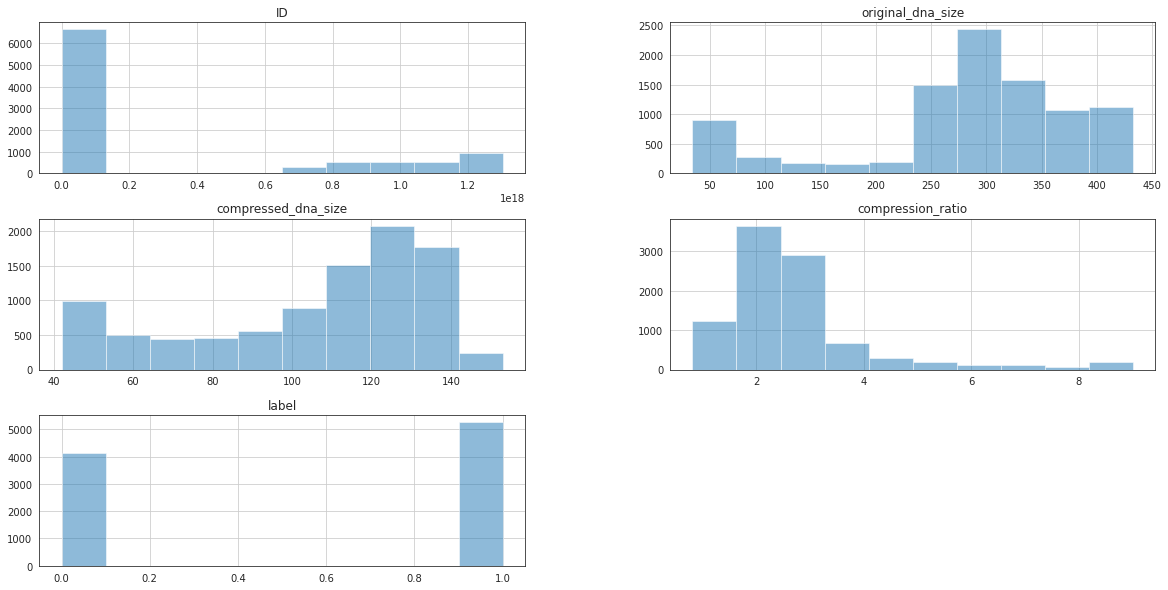

In [76]:
from matplotlib import pyplot
all.hist(alpha=0.5, figsize=(20, 10))
pyplot.show()

In [77]:
new_all = all.copy()
new_all['original_dna_size'] = np.log(new_all['original_dna_size'])
new_all['compressed_dna_size'] = np.log(new_all['compressed_dna_size'])

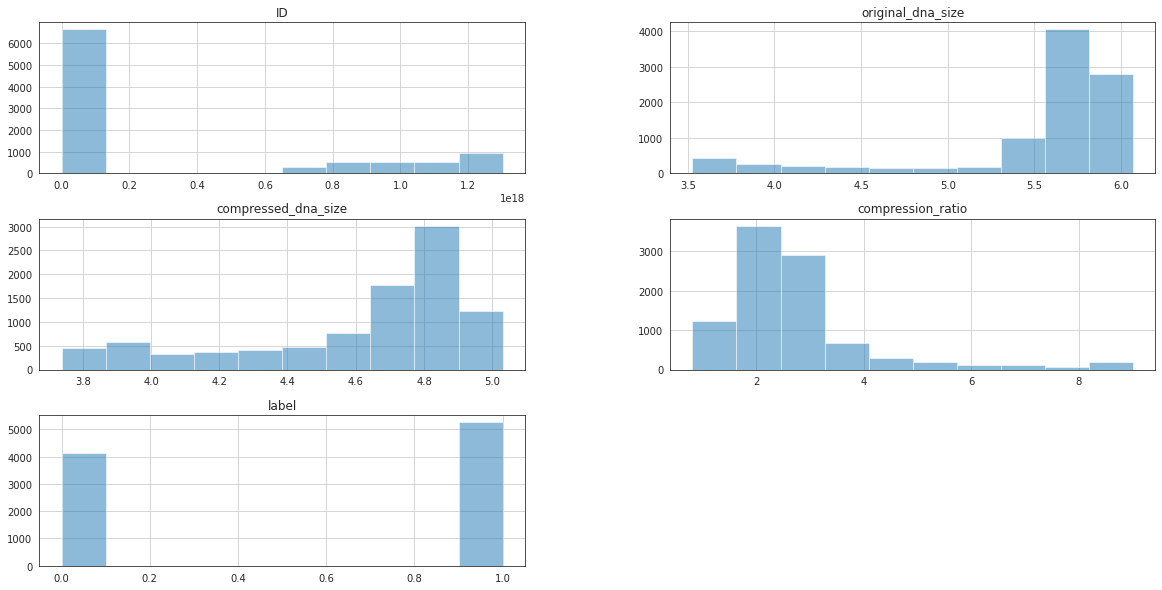

In [78]:
from matplotlib import pyplot
new_all.hist(alpha=0.5, figsize=(20, 10))
pyplot.show()